# Demo Phase Correlation

Illustrate using Phase Correlation to estimate rotation and translation between images.

## Description

In this lesson we explain how to use Phase Correlation to
estimate the angle of rotation and the translation between 2D
images.

Converting an image from Cartesian to Polar coordinates


It converts a plane from coordinates $(x,y)$ to
$(\theta,r)$, with $x = r \cos \theta$ and $y = r \sin \theta$.
Notice that the domain in polar coordinates must be 
informed explicitaly and will influence in the angle resolution.

In [2]:
import numpy as np
import sys,os
ia898path = os.path.abspath('../../')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia

%matplotlib inline
import matplotlib.image as mpimg

""
""

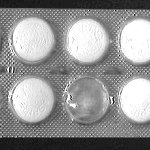

""
""

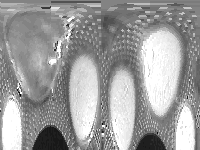

In [17]:
#f = ia.normalize(ia.gaussian((151,151), [[75],[75]], [[800,0],[0,800]]), [0,200]).astype(uint8)

f = mpimg.imread("../data/astablet.tif")
H,W = f.shape
f = f[:,H//2:H//2+H]
#ia.adshow(ia.isolines(f,10,3), "Image in cartesian coordinates")
g = ia.polar(f,(150,200),2*np.pi)
ia.adshow(f)
ia.adshow(g)
#ia.adshow(ia.isolines(g.astype(int),10,3), "Image in polar coordinates")
#adshow(g, "Image in polar coordinates")

""
""

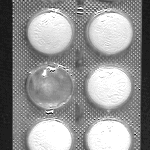

""
""

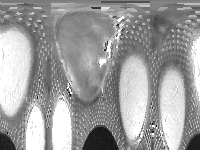

In [19]:
f1 = f
f2 = f.T[:,::-1]
g2 = ia.polar(f2,(150,200),2*np.pi)

ia.adshow(f2)
ia.adshow(g2)

""
""
""
""

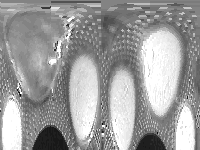
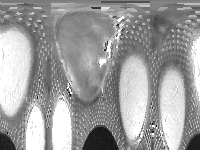

In [20]:
nb = ia.nbshow(2)
nb.nbshow(g)
nb.nbshow(g2)
nb.nbshow()

(150, 200)


""
""

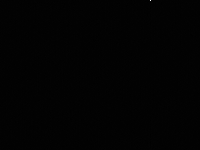

[150  50]
0.961937534587


In [23]:
h = ia.phasecorr(g,g2)
print(h.shape)
ia.adshow(ia.normalize(h))
i = np.argmax(h)
row,col = np.unravel_index(i,h.shape)
v = h[row,col]
print(np.array(g.shape) - np.array((row,col)))
print(v)

## Estimating the angle of rotation

The following function will be used to estimate the angle of rotation between 2D images.

In [ ]:
def rotphasecorr2d(f,h):
    F = np.fft.fftn(f)
    H = np.fft.fftn(h)
    pF = ia.polar(ia.dftview(F),(F.shape[0]/2,360),np.pi)
    pH = ia.polar(ia.dftview(H),(H.shape[0]/2,360),np.pi)
    return ia.phasecorr(pF, pH)

The function can be applied as follows.

uint8
uint8


""
f:Original image
""
f1:Image rotated by 30°

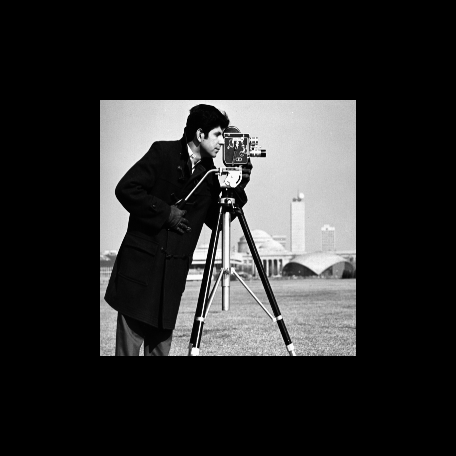
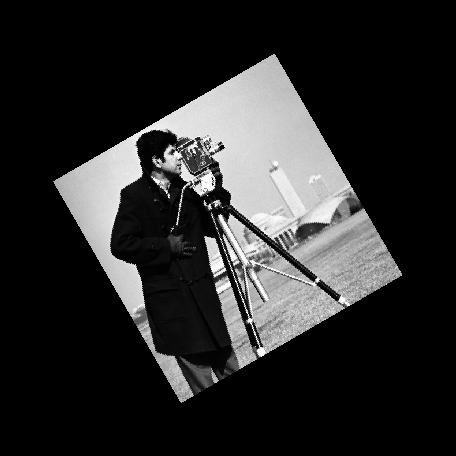

In [27]:
    f = mpimg.imread("../data/cameraman.tif")
    print(f.dtype)
    t = np.zeros(np.array(f.shape)+200,dtype=np.uint8)
    t[100:f.shape[0]+100,100:f.shape[1]+100] = f
    f = t
    
    t1 = np.array([
                [1,0,-f.shape[0]/2.],
                [0,1,-f.shape[1]/2.],
                [0,0,1]]);

    t2 = np.array([
                [1,0,f.shape[0]/2.],
                [0,1,f.shape[1]/2.],
                [0,0,1]]);

    theta = np.radians(30)
    r1 = np.array([
            [np.cos(theta),-np.sin(theta),0],
            [np.sin(theta),np.cos(theta),0],
            [0,0,1]]);
    
    T = t2.dot(r1).dot(t1)
    print(f.dtype)
    f1 = ia.affine(f,T,0)
    #f1.shape = f.shape
    
    nb.nbshow(f, "f:Original image")
    nb.nbshow(f1, "f1:Image rotated by 30°")
    nb.nbshow()

""
FS
""
F1S

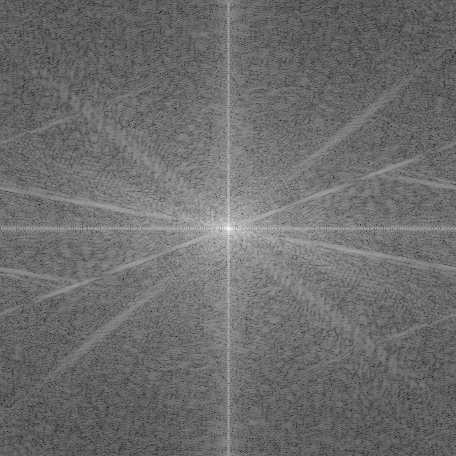
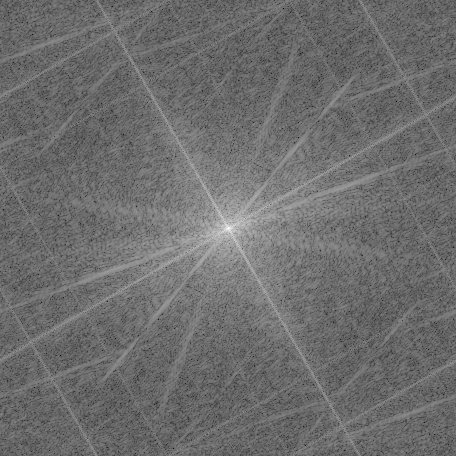

In [33]:
nb = ia.nbshow(2)
F = np.fft.fftn(f)
F1 = np.fft.fftn(f1)
FS = ia.dftview(F)
F1S = ia.dftview(F1)
nb.nbshow(FS,'FS')
nb.nbshow(F1S,'F1S')
nb.nbshow()

""
polar FS
""
polar F1S

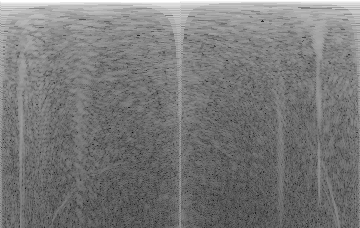
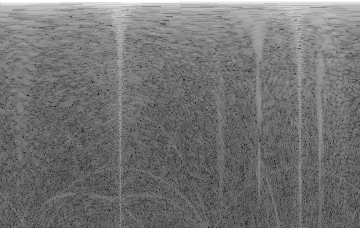

In [38]:
pFS = ia.polar(FS,(FS.shape[0]//2,360),np.pi)
pF1S = ia.polar(F1S,(F1S.shape[0]//2,360),np.pi)
nb.nbshow(ia.normalize(pFS),'polar FS')
nb.nbshow(ia.normalize(pF1S),'polar F1S')
nb.nbshow()

""
""

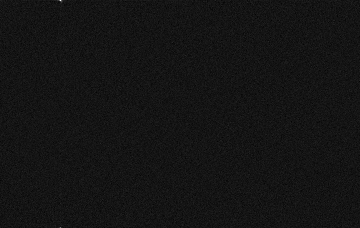

In [41]:
pg = ia.phasecorr(pFS,pF1S)
ia.adshow(ia.normalize(pg))

In [43]:
peak = np.unravel_index(np.argmax(pg), pg.shape)
    
# Calculate the angle
ang = (float(peak[1])/pg.shape[1])*180
print(ang)

30.0


## Estimating the angle of rotation and the translation

Now we will compute the angle of rotation and the translation. The function below first find the
angle of rotation; after that, it rotate the image and find the translation. Two phase correlation
maps are returned: one for the translation and other for rotation.

In [ ]:
import scipy

def trphasecorr2d(f,h):
    rg = ia.rotphasecorr2d(f,h)
    peak = np.unravel_index(argmax(rg), rg.shape)
    ang = (float(peak[1])/rg.shape[1])*180
    h_rot = scipy.ndimage.interpolation.rotate(h, -ang, reshape=False)
    g = ia.phasecorr(f,h_rot)
    return g, rg

The following code find the angle of rotation and the translation. Then, the original image is obtained
from the rotated and translated sample image.

In [ ]:
t3 = np.array([
            [1,0,50],
            [0,1,32],
            [0,0,1]]);

T = np.dot(t3,T)
h = ia.affine(f,T,0)
h.shape = f.shape

ia.adshow(f, "Original image")
ia.adshow(h, "Image rotated by 30° and translated by (50,32)")

g, rg = trphasecorr2d(f,h)
g = ia.normalize(g)
rg = ia.normalize(rg)

trans_peak = np.unravel_index(argmax(g), g.shape)
rot_peak = np.unravel_index(argmax(rg), rg.shape)
ang = (float(rot_peak[1])/rg.shape[1])*180
trans = (np.array(h.shape)-np.array(trans_peak))

np.adshow(g, "Translation correlation map - Peak %s, \n corresponds to translation %s"%(str(trans_peak), str(tuple(trans))))
np.adshow(ianormalize(rg), "Rotation correlation map - Peak %s, corresponds to angle %f°"%(str(rot_peak),ang))

t4 = np.array([
            [1,0,-trans[0]],
            [0,1,-trans[1]],
            [0,0,1]]);


theta1 = radians(-ang)
r2 = np.array([
        [np.cos(theta1),-np.sin(theta1),0],
        [np.sin(theta1),np.cos(theta1),0],
        [0,0,1]]);

T1 = dot(t4,dot(t2,dot(r2,t1)))
f1 = ia.affine(h,T1,0)
f1.shape = h.shape
ia.adshow(f1, "Sample image rotated and translated by %f° and %s, respectively"%(-ang,tuple(-trans)))

## See Also

- `iaphasecorr iaphasecorr` -- Phase correlation.
- `iapolar iapolar` -- Cartesian to polar coordinate transformation.
- `iaffine iaffine` -- Affine transform.
- `iacorrdemo iacorrdemo` -- Illustrate the Template Matching technique.

## References


1. B. Srinivasa Reddy and B. N. Chatterji. An FFT-Based Technique for Translation, Rotation, and 
   Scale-Invariant Image Registration. IEEE Trans. on Image Processing. vol 5. n. 8, 1996. `http://ieeexplore.ieee.org/iel4/83/11100/00506761.pdf?isnumber=11100&prod=JNL&arnumber=506761&arSt=1266&ared=1271&arAuthor=Reddy%2C+B.S.%3B+Chatterji%2C+B.N. PDF at IEEE`
   

## Contributions

- André Luis da Costa, 1st semester 2011